## Setup

**In order to get the fastest predictions you need to enable GPUs for the notebook:**
* Navigate to Edit→Notebook Settings
* select GPU from the Hardware Accelerator drop-down
(https://colab.research.google.com/notebooks/gpu.ipynb#scrollTo=oM_8ELnJq_wd)

In [5]:
!git clone https://github.com/automl/TabPFN

Cloning into 'TabPFN'...
remote: Enumerating objects: 461, done.
remote: Counting objects: 100% (192/192), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 461 (delta 144), reused 150 (delta 108), pack-reused 269
Receiving objects: 100% (461/461), 258.24 MiB | 18.43 MiB/s, done.
Resolving deltas: 100% (278/278), done.
Updating files: 100% (46/46), done.


In [ ]:
!pip install -r TabPFN/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 498 kB 5.2 MB/s 
     |████████████████████████████████| 831.4 MB 2.6 kB/s 
     |████████████████████████████████| 22.3 MB 1.2 MB/s 
     |████████████████████████████████| 636 kB 54.7 MB/s 
     |████████████████████████████████| 166.7 MB 54 kB/s 
     |████████████████████████████████| 76 kB 4.8 MB/s 
     |████████████████████████████████| 15.7 MB 23.3 MB/s 
     |████████████████████████████████| 119 kB 63.9 MB/s 
     |████████████████████████████████| 67.4 MB 109 kB/s 
     |████████████████████████████████| 965 kB 47.8 MB/s 
     |████████████████████████████████| 4.3 MB 51.4 MB/s 
     |████████████████████████████████| 76 kB 4.8 MB/s 
  Created wheel for openml: filename=openml-0.12.2-py3-none-any.whl size=137326 sha256=48c0644c8b30e0f41d9040e51ff40703a04c8838a6746692045eb47b7ed09001
  Stored in directory: /root/.cache/pip/wheels/6a/20/88/

In [ ]:
!pip install adjustText --no-deps
!pip install torchmetrics --no-deps
!pip install -U seaborn --no-deps
!pip install -U matplotlib==3.1.3 --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=2e0429f4302991f41abb6d1d5ac98dfa9762a8ac82c322ee8a3f06c3b22f3a89
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 529 kB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 288 kB 3.4 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |███████████████████████████████

[RESTART NOTEBOOK]

In [ ]:
raise Exception("restart the notebook please")

In [1]:
%load_ext autoreload
%autoreload 2

In [741]:
import sys

import numpy as np
from pathlib import Path
import pandas as pd
import torch
import openml
import os
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from pathlib import Path

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split

from tabpfn.scripts.transformer_prediction_interface import TabPFNClassifier

import matplotlib.pyplot as plt

from tabpfn.scripts import tabular_baselines

import seaborn as sns
import numpy as np

from tabpfn.datasets import load_openml_list, valid_dids_classification, test_dids_classification, open_cc_dids, open_cc_valid_dids, grinzstjan_numerical_classification, grinzstjan_categorical_classification
from tabpfn.scripts.tabular_baselines import *
from tabpfn.scripts.tabular_evaluation import evaluate
from tabpfn.scripts.tabular_metrics import calculate_score, make_ranks_and_wins_table, make_metric_matrix
from tabpfn.scripts import tabular_metrics

from adjustText import adjust_text
import matplotlib.patheffects as path_effects

In [742]:
from tabpfn.scripts.transformer_prediction_interface import TabPFNClassifier
from tabpfn.scripts.decision_boundary import DecisionBoundaryDisplay

## Loading Datasets

In [676]:
import _pickle as cPickle
with open(r"tabpfn/datasets/cc_valid_datasets_multiclass.pickle", "rb") as output_file:
  cc_valid_datasets_multiclass = cPickle.load(output_file)
with open(r"tabpfn/datasets/cc_test_datasets_multiclass.pickle", "rb") as output_file:
  cc_test_datasets_multiclass = cPickle.load(output_file)
#cc_valid_datasets_multiclass = [ds for ds in cc_valid_datasets_multiclass if ds[0] != 'flags']

In [57]:
#import _pickle as cPickle
#with open(r"TabPFN/tabpfn/datasets/cc_grin_numerical_datasets_multiclass.pickle", "wb") as output_file:
#  cPickle.dump(grin_datasets_multiclass_numerical, output_file)
#with open(r"TabPFN/tabpfn/datasets/cc_grin_categorical_datasets_multiclass.pickle", "wb") as output_file:
#  cPickle.dump(grin_datasets_multiclass_categorical, output_file)

In [6]:

cc_valid_datasets_multiclass, cc_valid_datasets_multiclass_df = load_openml_list(list(set(open_cc_valid_dids) - {285})
                                                                            , multiclass=True
                                                                            , shuffled=True
                                                                            , filter_for_nan=False
                                                                            , max_samples = 2000
                                                                            , num_feats=100
                                                                            , return_capped=False) # 285: Flags is buggy
cc_test_datasets_multiclass, cc_test_datasets_multiclass_df = load_openml_list(open_cc_dids
                                                                            , multiclass=True
                                                                            , shuffled=True
                                                                            , filter_for_nan=False
                                                                            , max_samples = 2000
                                                                            , num_feats=100
                                                                            , return_capped=False)


Number of datasets: 149
Loading breast-cancer 13 ..
Loading colic 25 ..
Loading dermatology 35 ..
Loading sonar 40 ..
Loading glass 41 ..
Loading haberman 43 ..
Loading tae 48 ..
Loading heart-c 49 ..
Loading heart-h 51 ..
Loading heart-statlog 53 ..
Loading hepatitis 55 ..
Loading vote 56 ..
Loading ionosphere 59 ..
Loading iris 61 ..
Loading wine 187 ..
Loading hayes-roth 329 ..
Loading monks-problems-1 333 ..
Loading monks-problems-2 334 ..
Loading monks-problems-3 335 ..
Loading SPECT 336 ..
Loading SPECTF 337 ..
Loading grub-damage 338 ..
Loading synthetic_control 377 ..
Loading prnn_crabs 446 ..
Loading analcatdata_lawsuit 450 ..
Loading irish 451 ..
Loading analcatdata_broadwaymult 452 ..
Loading analcatdata_reviewer 460 ..
Loading backache 463 ..
Loading prnn_synth 464 ..
Loading schizo 466 ..
Loading profb 470 ..
Loading analcatdata_germangss 475 ..
Loading biomed 481 ..
Loading rmftsa_sleepdata 679 ..
Loading diggle_table_a2 694 ..
Loading rmftsa_ladata 717 ..
Loading pwLinea

## Evaluation Setup

In [744]:
device = 'cpu'

def eval_method(datasets, task_type, method, dids, selector, eval_positions, max_time, metric_used, split_number, append_metric=True, fetch_only=False, verbose=False):
    dids = dids if type(dids) is list else [dids]
    results = {}
    for did in dids:
        ds = datasets
        ds = ds if did is None else ds[did:did+1]

        if not fetch_only and 'transformer_gpu' in method:
            classifier_gpu_N_1 = TabPFNClassifier(device='cuda', N_ensemble_configurations=1)
            clf_dict['transformer_gpu_N_1'] = partial(clf_dict['transformer'], classifier=classifier_gpu_N_1, device='cuda')
            
            classifier_gpu_N_8 = TabPFNClassifier(device='cuda', N_ensemble_configurations=8)
            clf_dict['transformer_gpu_N_8'] = partial(clf_dict['transformer'], classifier=classifier_gpu_N_8, device='cuda')

            classifier_gpu_N_32 = TabPFNClassifier(device='cuda', N_ensemble_configurations=32)
            clf_dict['transformer_gpu_N_32'] = partial(clf_dict['transformer'], classifier=classifier_gpu_N_32, device='cuda')
        clf = clf_dict[method]

        time_string = '_time_'+str(max_time) if max_time else ''
        metric_used_string = '_'+tabular_baselines.get_scoring_string(metric_used, usage='') if append_metric else ''
        splits = [split_number] if type(split_number) is int else split_number
        for split in splits:
            result = evaluate(datasets=ds
                              , model=clf
                              , method=method+time_string+metric_used_string
                              , bptt=2048
                              , base_path=base_path
                              , eval_positions=eval_positions
                              , device=device
                              , max_splits=1
                              , overwrite=overwrite
                              , save=True
                              , metric_used=metric_used
                              , path_interfix=task_type
                              , fetch_only=fetch_only
                              , split_number=split
                              , verbose=verbose
                              , max_time=max_time)
        results.update(result)
    
    return results

In [745]:
from functools import partial
classifier_cpu_N_1 = TabPFNClassifier(device='cpu', N_ensemble_configurations=1)
clf_dict['transformer_gpu_N_1'] = partial(clf_dict['transformer'], classifier=classifier_cpu_N_1)

classifier_gpu_N_8 = TabPFNClassifier(device='cpu', N_ensemble_configurations=8)
clf_dict['transformer_gpu_N_8'] = partial(clf_dict['transformer'], classifier=classifier_gpu_N_8)

classifier_gpu_N_32 = TabPFNClassifier(device='cpu', N_ensemble_configurations=32)
clf_dict['transformer_gpu_N_32'] = partial(clf_dict['transformer'], classifier=classifier_gpu_N_32)

classifier_cpu_N_1 = TabPFNClassifier(device='cpu', N_ensemble_configurations=1)
clf_dict['transformer_cpu_N_1'] = partial(clf_dict['transformer'], classifier=classifier_cpu_N_1)

classifier_cpu_N_8 = TabPFNClassifier(device='cpu', N_ensemble_configurations=8)
clf_dict['transformer_cpu_N_8'] = partial(clf_dict['transformer'], classifier=classifier_cpu_N_8)

classifier_cpu_N_32 = TabPFNClassifier(device='cpu', N_ensemble_configurations=32)
clf_dict['transformer_cpu_N_32'] = partial(clf_dict['transformer'], classifier=classifier_cpu_N_32)

Using style prior: True
Using cpu:0 device
Using a Transformer with 25.82 M parameters
Using style prior: True
Using cpu:0 device
Using a Transformer with 25.82 M parameters
Using style prior: True
Using cpu:0 device
Using a Transformer with 25.82 M parameters
Using style prior: True
Using cpu:0 device
Using a Transformer with 25.82 M parameters
Using style prior: True
Using cpu:0 device
Using a Transformer with 25.82 M parameters
Using style prior: True
Using cpu:0 device
Using a Transformer with 25.82 M parameters


In [1021]:
clf_dict['svm'] = partial(tabular_baselines.svm_metric)
clf_dict['gp_default'] = partial(clf_dict['gp'], no_tune={'params_y_scale': 0.1, 'params_length_scale': 0.1})
clf_dict['svm_default'] = partial(tabular_baselines.svm_metric, no_tune={})
clf_dict['gradient_boosting_default'] = partial(tabular_baselines.gradient_boosting_metric, no_tune={})
clf_dict['gradient_boosting'] = partial(tabular_baselines.gradient_boosting_metric)
clf_dict['lightgbm_default'] = partial(clf_dict['lightgbm'], no_tune={})
clf_dict['xgb_default'] = partial(clf_dict['xgb'], no_tune={})
clf_dict['rf_default'] = partial(clf_dict['random_forest'], no_tune={})
clf_dict['rf_default_n_estimators_10'] = partial(clf_dict['random_forest'], no_tune={})
clf_dict['rf_default_n_estimators_32'] = partial(clf_dict['random_forest'], no_tune={})
clf_dict['catboost_default'] = partial(clf_dict['catboost'], no_tune={})
clf_dict['logistic_default'] = partial(clf_dict['logistic'], no_tune={})

In [752]:
from tabpfn.scripts.tabular_baselines import sklearn_mlp_metric

In [753]:
clf_dict['catboost_gpu'] = partial(clf_dict['catboost'], gpu_id=0)
clf_dict['catboost_default_gpu'] = partial(clf_dict['catboost'], no_tune={}, gpu_id=0)
clf_dict['xgb_gpu'] = partial(clf_dict['xgb'], gpu_id=0)
clf_dict['xgb_default_gpu'] = partial(clf_dict['xgb'], no_tune={}, gpu_id=0)
clf_dict['mlp'] = sklearn_mlp_metric

In [754]:
max_times = [3600]
metric_used = tabular_metrics.auc_metric
methods = [
            'mlp',
           'transformer_cpu_N_1', 
           'transformer_gpu_N_1', 
           'transformer_gpu_N_8', 
           'transformer_gpu_N_32', 
           'transformer_cpu_N_8',
          'transformer_cpu_N_32',

           'lightgbm',
            'lightgbm_default',

           'gp',
           'gp_default',

           'svm_default',

           'gradient_boosting_default',

           'xgb',
           'xgb_default',
           
           'knn', 
           'logistic', 

           'random_forest',
           'rf_default',
           'rf_default_n_estimators_10',
           'rf_default_n_estimators_32']

In [303]:
methods_defaults = [
            'lightgbm_default',
           'gp_default',
           'svm_default',
           'gradient_boosting_default',
           'xgb_default',
    'catboost_default',
           'rf_default',
           'rf_default_n_estimators_10',
           'rf_default_n_estimators_32']

In [304]:
methods_tabpfn_cpu = [ 'transformer_cpu_N_1', 
           'transformer_cpu_N_8',
          'transformer_cpu_N_32',]

In [305]:
methods_tabpfn_gpu = [ 'transformer_gpu_N_1', 
           'transformer_gpu_N_8',
          'transformer_gpu_N_32',]

In [306]:
methods_baselines_gpu = [ 'xgb_default_gpu', 'xgb_gpu', 'catboost_gpu', 'catboost_default_gpu']

In [832]:
methods_tuned = ['lightgbm', 'knn', 'logistic', 'random_forest', 'xgb', 'gp', 'catboost', 'autosklearn', 'autogluon', 'autosklearn2']

In [833]:
methods = methods_tabpfn_cpu + methods_tabpfn_gpu + methods_defaults + methods_tuned + methods_baselines_gpu + ['mlp']
methods_cpu = methods_tabpfn_cpu + methods_defaults + methods_tuned
methods_gpu = methods_tabpfn_gpu + methods_baselines_gpu

In [310]:
clf_relabeler = {'transformer': 'TabPFN'
                 , 'transformer_gpu_N_8': 'TabPFN (N_ensembles=8, GPU)'
                 , 'transformer_gpu_N_32': 'TabPFN (N_ensembles=32, GPU)'
                 , 'transformer_cpu_N_8': 'TabPFN (N_ensembles=8, CPU)'
                 , 'transformer_cpu_N_32': 'TabPFN (N_ensembles=32, CPU)'
, 'random_forest': 'tuned Random Forest'
                 
             , 'autogluon': 'Autogluon'
             , 'autosklearn2': 'Autosklearn2'
             , 'gp_default': 'default GP (RBF)'
             , 'gp': 'tuned GP (RBF)'
             , 'logistic': 'tuned Log. Regr.'
             , 'knn': 'tuned KNN'
             , 'catboost': 'tuned Catboost'
                 , 'catboost_default': 'default Catboost'
            , 'xgb': 'tuned XGB'
            , 'xgb_default': 'default XGB'
            , 'svm': 'tuned SVM'
            , 'svm_default': 'default SVM'
                 , 'lightgbm': 'LGBM'
                 , 'autosklearn': 'Auto Sklearn'
                       , 'autogluon': 'Autogluon'
                 , 'lightgbm_default': 'default LGBM'
                 , 'gradient_boosting': 'Grad. Boost.'
                 , 'gradient_boosting_default': 'default Grad. Boost.'
            , 'rf_default': 'default Random Forest'
            , 'rf_default_n_estimators_10': 'Random Forest (N_est = 10)'
            , 'rf_default_n_estimators_32': 'Random Forest (N_est = 32)'
            }

clf_relabeler_short = {'transformer': 'TabPFN'
                 , 'transformer_gpu_N_8': 'TabPFN (N_ens=8, GPU)'
                 , 'transformer_gpu_N_32': 'TabPFN (N_ens=32, GPU)'
                 , 'transformer_cpu_N_8': 'TabPFN (N_ens=8, CPU)'
                 , 'transformer_cpu_N_32': 'TabPFN (N_ens=32, CPU)'
                       , 'transformer_cpu_N_1': 'TabPFN (N_ens=1, CPU)'
                 , 'transformer_gpu_N_1': 'TabPFN (N_ens=1, GPU)'
, 'catboost_default': 'default Catboost'
             , 'autogluon': 'Autogluon'
             , 'autosklearn2': 'Autosklearn2'
             , 'gp_default': 'default GP (RBF)'
                 , 'gradient_boosting': 'tuned Grad. Boost.'
                 , 'gradient_boosting_default': 'default Grad. Boost.'
                 , 'random_forest': 'tuned Rand. Forest'
                 , 'lightgbm': 'tuned LGBM'
                 , 'lightgbm_default': 'default LGBM'
             , 'gp': 'tuned GP (RBF)'
             , 'logistic': 'tuned Log. Regr.'
             , 'knn': 'tuned KNN'
             , 'catboost': 'tuned Catboost'
                       , 'autosklearn': 'Auto Sklearn'
                       , 'autogluon': 'Autogluon'
            , 'xgb': 'tuned XGB'
            , 'xgb_default': 'default XGB'
            , 'svm': 'tuned SVM'
            , 'svm_default': 'default SVM'
            , 'rf': 'tuned Random Forest'
            , 'rf_default': 'Rand. Forest (N_est = 100)'
            , 'rf_default_n_estimators_10': 'Rand. Forest (N_est = 10)'
            , 'rf_default_n_estimators_32': 'Rand. Forest (N_est = 32)'
            }

In [311]:
# Further Baselines, you can add these strings to the above 'methods' list:
# - 'catboost' (With given settings uses too much CPU RAM here on Colab, feel free to tweak)
# - 'autogluon' & 'autosklearn' (Install dependencies beforehand)

In [710]:
# For the evaluation you can again pick subsets among the predicted ones
#test_datasets = grin_datasets_multiclass_numerical + grin_datasets_multiclass_categorical# + cc_valid_datasets_multiclass
test_datasets = cc_test_datasets_multiclass #cc_valid_datasets_multiclass + cc_test_datasets_multiclass
dids = range(0, len(test_datasets))
test_datasets_eval = [ds for (i, ds) in enumerate(test_datasets) if i in dids]

In [935]:
!cp /work/dlclarge1/hollmann-PFN_Tabular/results/tabular/multiclass/*xgb*3600* /work/dlclarge1/hollmann-PFN_Tabular/results_nov_2022/new/results/tabular/multiclass/

In [882]:
splits = range(1, 6)
base_path = os.path.join('/work/dlclarge1/hollmann-PFN_Tabular/results_nov_2022/new') # results_nov_2022/new
log_folder = os.path.join(base_path, "log_test/%j")
pos = str(1000)
overwrite=False # Wheater to overwrite existing results

In [471]:
!ls /work/dlclarge1/hollmann-PFN_Tabular/results_nov_2022/new/results/tabular/multiclass/results_catboost_time*

/work/dlclarge1/hollmann-PFN_Tabular/results_nov_2022/new/results/tabular/multiclass/results_catboost_time_3600_roc_auc_analcatdata_apnea1_237_474_0.npy
/work/dlclarge1/hollmann-PFN_Tabular/results_nov_2022/new/results/tabular/multiclass/results_catboost_time_3600_roc_auc_analcatdata_apnea1_237_474_1.npy
/work/dlclarge1/hollmann-PFN_Tabular/results_nov_2022/new/results/tabular/multiclass/results_catboost_time_3600_roc_auc_analcatdata_apnea1_237_474_2.npy
/work/dlclarge1/hollmann-PFN_Tabular/results_nov_2022/new/results/tabular/multiclass/results_catboost_time_3600_roc_auc_analcatdata_apnea1_237_474_3.npy
/work/dlclarge1/hollmann-PFN_Tabular/results_nov_2022/new/results/tabular/multiclass/results_catboost_time_3600_roc_auc_analcatdata_apnea1_237_474_4.npy
/work/dlclarge1/hollmann-PFN_Tabular/results_nov_2022/new/results/tabular/multiclass/results_catboost_time_3600_roc_auc_analcatdata_apnea1_237_474_5.npy
/work/dlclarge1/hollmann-PFN_Tabular/results_nov_2022/new/results/tabular/multicla

In [638]:
!ls /work/dlclarge1/hollmann-PFN_Tabular/results_nov_2022/new/results/tabular/multiclass/results_autogluon_* | wc -l

1074


In [672]:
!cp /work/dlclarge1/hollmann-PFN_Tabular/results_nov_2022/new/results/tabular/multiclass/results_autosklearn2_* automl_results/ -r

In [675]:
!zip -r automl_results.zip automl_results

  adding: automl_results/ (stored 0%)
  adding: automl_results/results_autosklearn2_time_3600.0_roc_auc_chscase_vine2_234_468_5.npy (deflated 45%)
  adding: automl_results/results_autosklearn2_time_3600.0_roc_auc_KnuggetChase3_97_194_5.npy (deflated 42%)
  adding: automl_results/results_transformer_gpu_N_32_time_3600.0_roc_auc_pm10_250_500_5.npy (deflated 62%)
  adding: automl_results/results_transformer_gpu_N_1_time_3600.0_roc_auc_irish_250_500_2.npy (deflated 63%)
  adding: automl_results/results_catboost_default_time_3600.0_roc_auc_stock_475_950_2.npy (deflated 49%)
  adding: automl_results/results_catboost_default_time_3600.0_roc_auc_colleges_usnews_651_1302_5.npy (deflated 49%)
  adding: automl_results/results_autosklearn2_time_3600.0_roc_auc_tokyo1_479_958_3.npy (deflated 49%)
  adding: automl_results/results_transformer_gpu_N_1_time_3600.0_roc_auc_backache_90_180_2.npy (deflated 54%)
  adding: automl_results/results_autosklearn2_time_3600.0_roc_auc_thyroid-new_107_214_0.npy (def

In [502]:
!unzip multiclass.zip

Archive:  multiclass.zip
   creating: multiclass/
  inflating: __MACOSX/._multiclass   
  inflating: multiclass/results_transformer_gpu_N_4_time_3600.0_roc_auc_GAMETES_Epistasis_2-Way_20atts_0.1H_EDM-1_1_800_1600_3.npy  
  inflating: __MACOSX/multiclass/._results_transformer_gpu_N_4_time_3600.0_roc_auc_GAMETES_Epistasis_2-Way_20atts_0.1H_EDM-1_1_800_1600_3.npy  
  inflating: multiclass/results_transformer_gpu_N_32_time3600.0roc_auc_vote_217_434_1.npy  
  inflating: __MACOSX/multiclass/._results_transformer_gpu_N_32_time3600.0roc_auc_vote_217_434_1.npy  
  inflating: multiclass/results_transformer_gpu_N_4_time3600.0roc_auc_analcatdata_vineyard_234_468_5.npy  
  inflating: __MACOSX/multiclass/._results_transformer_gpu_N_4_time3600.0roc_auc_analcatdata_vineyard_234_468_5.npy  
  inflating: multiclass/results_transformer_gpu_N_32_time3600.0roc_auc_cmc_736_1472_4.npy  
  inflating: __MACOSX/multiclass/._results_transformer_gpu_N_32_time3600.0roc_auc_cmc_736_1472_4.npy  
  inflating: multicl

In [674]:
import os
direc = "automl_results/"
for file in next(os.walk(direc))[2]:
    os.rename(os.path.join(direc, file), os.path.join(direc, file.replace("_3600_", "_3600.0_")))

In [670]:
!cp multiclass/* automl_results/ 

In [90]:
!mkdir {base_path}/results
!mkdir {base_path}/results/tabular/
!mkdir {base_path}/results/tabular/multiclass/

mkdir: cannot create directory ‘/work/dlclarge1/hollmann-PFN_Tabular/results_nov_2022/new/results’: File exists
mkdir: cannot create directory ‘/work/dlclarge1/hollmann-PFN_Tabular/results_nov_2022/new/results/tabular/’: File exists
mkdir: cannot create directory ‘/work/dlclarge1/hollmann-PFN_Tabular/results_nov_2022/new/results/tabular/multiclass/’: File exists


## Cluster setup

In [314]:
from samlib import submitit
from samlib.utils import chunker

In [315]:
from typing import List
from submitit import SlurmExecutor
class BoschSlurmExecutor(SlurmExecutor):
    def _make_submission_command(self, submission_file_path) -> List[str]:
        return ["sbatch", str(submission_file_path), '--bosch']

ex = BoschSlurmExecutor(folder=log_folder)
ex.update_parameters(time=1200
                     , partition="bosch_cpu-cascadelake"
                     , mem_per_cpu=6000
                    , nodes=1
                    , cpus_per_task=1
                    , ntasks_per_node=1
#                     , setup=['export MKL_THREADING_LAYER=GNU']
                    ) #  mldlc_gpu-rtx2080


In [316]:
ex_gpu = submitit.AutoExecutor(folder=log_folder)
ex_gpu.update_parameters(timeout_min=3600, slurm_partition='mldlc_gpu-rtx2080') 

## Load pre-computed results

In [157]:
!git clone https://github.com/noahho/TabPFNResults

Cloning into 'TabPFNResults'...
remote: Enumerating objects: 1884, done.
remote: Counting objects: 100% (432/432), done.
remote: Compressing objects: 100% (175/175), done.
remote: Total 1884 (delta 274), reused 409 (delta 257), pack-reused 1452
Receiving objects: 100% (1884/1884), 804.78 MiB | 19.67 MiB/s, done.
Resolving deltas: 100% (868/868), done.
Updating files: 100% (761/761), done.


In [23]:
import pickle
with open("tabular_results.pkl", 'rb') as f:
    global_results = pickle.load(f)

In [158]:
import _pickle as cPickle
from os import listdir
from os.path import isfile, join
mypath = 'TabPFNResults/all_results/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

global_results = {}
for file in onlyfiles:
  with open(mypath+file, "rb") as output_file:
    print(file[:-7])
    global_results[file[:-7]] = cPickle.load(output_file)

rf_default_n_estimators_32_time_30roc_auc_split_12
transformer_gpu_N_32_time_30roc_auc_split_14
transformer_cpu_N_8_time_3600roc_auc_split_12
transformer_cpu_N_32_time_30roc_auc_split_3
gradient_boosting_default_time_30roc_auc_split_17
gp_time_30roc_auc_split_5
xgb_default_time_30roc_auc_split_0
gradient_boosting_time_30roc_auc_split_0
transformer_gpu_N_32_time_30roc_auc_split_16
random_forest_time_30roc_auc_split_10
transformer_cpu_N_8_time_60roc_auc_split_19
transformer_cpu_N_8_time_900roc_auc_split_17
gradient_boosting_time_30roc_auc_split_19
gp_time_30roc_auc_split_10
transformer_cpu_N_32_time_300roc_auc_split_19
transformer_gpu_N_1_time_30roc_auc_split_4
gp_default_time_30roc_auc_split_12
transformer_gpu_N_8_time_30roc_auc_split_8
transformer_cpu_N_8_time_0.5roc_auc_split_13
transformer_cpu_N_32_time_1roc_auc_split_9
transformer_cpu_N_8_time_1roc_auc_split_9
transformer_cpu_N_8_time_900roc_auc_split_9
transformer_cpu_N_32_time_60roc_auc_split_11
svm_default_time_30roc_auc_split_19

## Re-Running Evaluation
Only necessary if not using pre-computed results

### Running TabPFN & Baselines

In [322]:
print('Estimated evaluation time in minutes: ', len(methods_tuned) * len(dids) * len(splits) * max_times[0] * (1/60) * (1/50) * (1/60), ' h')

Estimated evaluation time in minutes:  27.0  h


In [764]:
r = eval_method(test_datasets, 'multiclass', 'mlp', 10, 'test', [1000], 30, metric_used, [1], fetch_only=False)


Calculating splits<function sklearn_mlp_metric at 0x7f1f7939a9d0> 479:   0%|          | 0/1 [00:09<?, ?it/s]

saved results to /work/dlclarge1/hollmann-PFN_Tabular/results_nov_2022/new/results/tabular/multiclass/results_mlp_time_30_roc_auc_tic-tac-toe_479_958_1.npy


In [765]:
r

{'metric_used': 'roc_auc_ovo',
 'bptt': 2048,
 'eval_positions': [1000],
 'tic-tac-toe_best_configs_at_1000': [{}],
 'tic-tac-toe_outputs_at_1000': array([[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
         0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
         1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
         1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
         1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
         0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
         1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
         1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
         0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
         0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
         0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
         1, 0, 1, 1, 1, 1, 1

In [66]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [324]:
overwrite = False

In [325]:
eval_positions = [1000] # 16, 32, 64, 128, 256, 512, 

In [1042]:
r = eval_method(test_datasets, 'multiclass', 'logistic_default', 1, 'test', eval_positions, max_time, metric_used, [split_number], fetch_only=False)

Calculating splitsfunctools.partial(<function logistic_metric at 0x7f1f3ebf3a60>, no_tune={}) 1000:   0%|          | 0/1 [00:00<?, ?it/s]

saved results to /work/dlclarge1/hollmann-PFN_Tabular/results_nov_2022/new/results/tabular/multiclass/results_logistic_default_time_3600_roc_auc_mfeat-fourier_1000_2000_5.npy


In [1043]:
r

{'metric_used': 'roc_auc_ovo',
 'bptt': 2048,
 'eval_positions': [1000],
 'mfeat-fourier_best_configs_at_1000': [{'best': {},
   'fit_time': 0.6236371994018555,
   'inference_time': 0.005254507064819336}],
 'mfeat-fourier_outputs_at_1000': array([[[9.81249630e-01, 4.21038043e-04, 1.49353244e-03, ...,
          3.75389318e-05, 1.31450975e-02, 1.21744338e-03],
         [3.48930852e-03, 7.14324951e-01, 1.71169844e-02, ...,
          7.88512826e-03, 1.74380187e-02, 4.59515750e-02],
         [3.78428632e-03, 4.65619892e-01, 1.18510146e-02, ...,
          1.21079139e-01, 6.52478449e-03, 3.02808303e-02],
         ...,
         [1.00401533e-03, 5.26525564e-02, 1.15683705e-01, ...,
          7.75959551e-01, 1.67167233e-03, 2.60474123e-02],
         [1.57448580e-03, 1.17807008e-01, 6.09661872e-03, ...,
          1.54274786e-02, 2.47007632e-03, 9.75303948e-02],
         [9.40691411e-01, 1.49362336e-03, 3.61141399e-03, ...,
          1.06264000e-04, 3.18038501e-02, 9.97469574e-03]]], dtype=float32

In [984]:
max_times = [60]

In [1044]:
jobs = []
overwrite = True
for m in tqdm(['logistic_default']): # methods
    for max_time in max_times:
      for did in chunks(list(dids[:]), 1):
        #for split_number in splits:
            #r = eval_method(test_datasets, 'multiclass', m, did, 'test', eval_positions, max_time, metric_used, [split_number], fetch_only=True)
            if True or torch.isnan(r['mean_metric']):
              jobs += [ex.submit(eval_method, test_datasets, 'multiclass', m, did, 'test', eval_positions, max_time, metric_used, splits)]
        

  0%|          | 0/1 [00:00<?, ?it/s]

Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle
Pickle

100%|██████████| 1/1 [01:07<00:00, 67.91s/it]


In [546]:
len(dids) *6

1074

In [1041]:
print(jobs[0].stdout())

submitit INFO (2022-11-18 07:23:25,731) - Starting with JobEnvironment(job_id=848640, hostname=kisexe11, local_rank=0(1), node=0(1), global_rank=0(1))
submitit INFO (2022-11-18 07:23:25,732) - Loading pickle: /work/dlclarge1/hollmann-PFN_Tabular/results_nov_2022/new/log_test/848640/848640_submitted.pkl



In [980]:
!squeue -u hollmann

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
            842310 bosch_cpu submitit hollmann  R      27:58      1 kisexe09
            842309 bosch_cpu submitit hollmann  R      28:01      1 kisexe09
            842018 bosch_cpu submitit hollmann  R    2:13:11      1 kisexe32
            842019 bosch_cpu submitit hollmann  R    2:13:11      1 kisexe32
            842020 bosch_cpu submitit hollmann  R    2:13:11      1 kisexe32
            842021 bosch_cpu submitit hollmann  R    2:13:11      1 kisexe32
            842022 bosch_cpu submitit hollmann  R    2:13:11      1 kisexe32
            842023 bosch_cpu submitit hollmann  R    2:13:11      1 kisexe32
            842024 bosch_cpu submitit hollmann  R    2:13:11      1 kisexe32
            842025 bosch_cpu submitit hollmann  R    2:13:11      1 kisexe32
            842026 bosch_cpu submitit hollmann  R    2:13:11      1 kisexe32
            842027 bosch_cpu submitit hollmann  R    2:13:11      1 

In [228]:
!scancel -q mldlc_gpu-rtx2080 

In [ ]:
!squeue -o "%.20i %.14P %.50j %.10u %.2t %20V %20L %.10M %.2D %16R %.4C %.10m" -u hollmann

### Loading Results into memory

In [1006]:

global_results = {}
overwrite=False

for method in ['autosklearn', 'autogluon']:# # autosklearn', 'autogluon', 'autosklearn2', 'transformer_gpu_N_32', 'catboost'  ['mlp', 'xgb', 'xgb_default', 'logistic']:
    for max_time in max_times:
        for split_number in splits:
            results_key = method+'_time_'+str(max_time)+tabular_baselines.get_scoring_string(metric_used, usage='')+'_split_'+str(split_number)
            global_results[results_key] = eval_method(test_datasets, 'multiclass', method, list(dids), 'test', 
                                                                                                                                    eval_positions
                                                      , fetch_only=True, 
                                                                                                                                    verbose=False, max_time=max_time,
                                                                                                                                    metric_used=metric_used, split_number=split_number)
            


### Evaluating metrics on results

In [996]:
import torchmetrics

In [1012]:
limit_to = ''
calculate_score(tabular_metrics.auc_metric, 'roc', global_results, test_datasets_eval, eval_positions, limit_to=limit_to)
calculate_score(tabular_metrics.cross_entropy, 'cross_entropy', global_results, test_datasets_eval, eval_positions, limit_to=limit_to)
calculate_score(tabular_metrics.accuracy_metric, 'acc', global_results, test_datasets_eval, eval_positions)
calculate_score(tabular_metrics.time_metric, 'time', global_results, test_datasets_eval, eval_positions, aggregator='sum', limit_to=limit_to)
calculate_score(tabular_metrics.inference_time_metric, 'inference_time', global_results, test_datasets_eval, eval_positions, aggregator='mean', limit_to=limit_to)
calculate_score(tabular_metrics.count_metric, 'count', global_results, test_datasets_eval, eval_positions, aggregator='sum', limit_to=limit_to)


Error calculating metric <function inference_time_metric at 0x7f1ef8c39700> with 'inference_time', <class 'KeyError'> at balance-scale 1000 inference_time
Error calculating metric <function inference_time_metric at 0x7f1ef8c39700> with 'inference_time', <class 'KeyError'> at mfeat-fourier 1000 inference_time
Error calculating metric <function inference_time_metric at 0x7f1ef8c39700> with 'inference_time', <class 'KeyError'> at breast-w 1000 inference_time
Error calculating metric <function inference_time_metric at 0x7f1ef8c39700> with 'inference_time', <class 'KeyError'> at mfeat-karhunen 1000 inference_time
Error calculating metric <function inference_time_metric at 0x7f1ef8c39700> with 'inference_time', <class 'KeyError'> at mfeat-morphological 1000 inference_time
Error calculating metric <function inference_time_metric at 0x7f1ef8c39700> with 'inference_time', <class 'KeyError'> at mfeat-zernike 1000 inference_time
Error calculating metric <function inference_time_metric at 0x7f1ef8

In [1013]:
calculate_score(tabular_metrics.brier_score_metric, 'brier_score', global_results, test_datasets_eval, eval_positions)
calculate_score(tabular_metrics.ece_metric, 'ece', global_results, test_datasets_eval, eval_positions)


In [1014]:
import _pickle as cPickle
#with open(r"all_results.pickle", "wb") as output_file:
#  cPickle.dump(global_results, output_file)

In [928]:
import _pickle as cPickle
#with open(r"all_results.pickle", "rb") as output_file:
#  global_results = cPickle.load(output_file)

## Creating Results Overview

### Table

In [1015]:
def to_str(data, format_string="%.3g", drop=False):
    if drop:
        formatted = data.apply(lambda x : (format_string % x)[1:])
    else:
        formatted = data.apply(lambda x : (format_string % x))
    return formatted

def format_to_stddev(table, key, mean_matrix, std_matrix):
  table.loc[f'Mean {key}'] = mean_matrix.mean()
  table.loc[f'Mean {key} Stds'] = std_matrix.mean()
  table.loc[[f'Mean {key} Stds']] = table.loc[[f'Mean {key} Stds']].apply(lambda data : to_str(data, format_string="%.2g", drop=True),axis=1)
  table.loc[[f'Mean {key}']] = table.loc[[f'Mean {key}']].apply(lambda data : to_str(data, format_string="%.3g", drop=True),axis=1)
  table.loc[f'Mean {key}'] = table.loc[f'Mean {key}'] + '+-' + table.loc[f'Mean {key} Stds']
  table.drop([f'Mean {key} Stds'], inplace=True)

In [1016]:
def make_tables(test_datasets_eval, metric_name):
  max_time = max_times[0]
  global_results_filtered = {**global_results}
  global_results_filtered = {k: global_results_filtered[k] for k in global_results_filtered.keys() if '_time_'+str(max_time)+tabular_baselines.get_scoring_string(metric_used, usage='') in k}

  brier_matrix, brier_matrix_stds, brier_matrix_per_split = make_metric_matrix(global_results_filtered, methods, pos, 'brier_score', test_datasets_eval)
  ece_matrix, ece_matrix_stds, ece_matrix_per_split = make_metric_matrix(global_results_filtered, methods, pos, 'ece', test_datasets_eval)
  roc_matrix, roc_matrix_stds, roc_matrix_per_split = make_metric_matrix(global_results_filtered, methods, pos, 'roc', test_datasets_eval)
  acc_matrix, acc_matrix_stds, acc_matrix_per_split = make_metric_matrix(global_results_filtered, methods, pos, 'acc', test_datasets_eval)
  cross_entropy_matrix, cross_entropy_matrix_stds, cross_entropy_matrix_per_split = make_metric_matrix(global_results_filtered, methods, pos, 'cross_entropy', test_datasets_eval)
  time_matrix, time_matrix_stds, time_matrix_per_split = make_metric_matrix(global_results_filtered, methods, pos, 'time', test_datasets_eval)
  inference_time_matrix, inference_time_matrix_stds, inference_time_matrix_per_split = make_metric_matrix(global_results_filtered, methods, pos, 'inference_time', test_datasets_eval)

  roc_rank, rocs_wins = make_ranks_and_wins_table(roc_matrix.copy())
  acc_rank, acc_wins = make_ranks_and_wins_table(acc_matrix.copy())
  cross_entropy_rank, cross_entropy_wins = make_ranks_and_wins_table(-cross_entropy_matrix.copy())

  table = roc_matrix.iloc[:0].copy()
  #table = roc_ovr_matrix.copy()
  #table = acc_matrix.copy()
  #table = cross_entropy_matrix.copy()

  table.loc['M. rank AUC OVO'] = roc_rank.values
  #table.loc['Mean rank AUC OVR'] = roc_ovr_rank.values
  table.loc['Mean rank Acc.'] = acc_rank.values
  #table.loc['Mean rank Bal. Acc.'] = balanced_acc_rank.values
  table.loc['Mean rank CE'] = cross_entropy_rank.values

  format_to_stddev(table, 'ROC AUC', roc_matrix, roc_matrix_stds)
  format_to_stddev(table, 'Acc.', acc_matrix, acc_matrix_stds)
  format_to_stddev(table, 'Cross Entropy', cross_entropy_matrix, cross_entropy_matrix_stds)
  format_to_stddev(table, 'Brier loss', brier_matrix, brier_matrix_stds)
  format_to_stddev(table, 'Expected Calibration Error', ece_matrix, ece_matrix_stds)

  table.loc['Mean time (s)'] = time_matrix.mean()

  metric_matrix, metric_matrix_stds, metric_matrix_per_split = make_metric_matrix(global_results_filtered, methods, pos, metric_name, test_datasets_eval)

  return metric_matrix, metric_matrix_per_split, table, time_matrix #.highlight_max(axis = 1, props= 'font-weight: bold;')

In [1017]:
test_datasets_eval = cc_test_datasets_multiclass

In [1018]:
pos = str(1000)

In [1019]:
results_matrix, results_matrix_per_split, table, time_matrix = make_tables(test_datasets_eval, 'inference_time')

In [1020]:
results_matrix[['autogluon', 'autosklearn']].mean()

autogluon      21.182224
autosklearn          NaN
dtype: float64

In [966]:
table[['xgb', 'xgb_default', 'logistic', 'mlp']].rename(columns={"xgb_default": "Default XGB", "xgb": "tuned XGB"
, "logistic": "tuned LogReg"
, "mlp": "default MLP"}).round(decimals=3).style.format(precision=3).set_caption("OpenML CC-18 Small Datasets (N = 30)")

In [880]:
results_matrix.round(decimals=3).style.highlight_max(axis = 1, props= 'font-weight: bold;').format(precision=3)

In [399]:
global_results[list(global_results.keys())[0]]

{'metric_used': 'roc_auc_ovo',
 'bptt': 2048,
 'eval_positions': [1000],
 'breast-cancer_best_configs_at_1000': [{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
    'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
    'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
    'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
    'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
    'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
    'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
    'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
    'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
    'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
    'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
    'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
    'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
    'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
   'model_performance': {'KNeighborsUnif_BAG_L1': 0.620567375886

In [397]:
test_datasets_eval_no_cat = [ds for ds in test_datasets_eval if len(ds[3]) == 0]
results_matrix_no_cat, results_matrix_per_split_no_cat, table_no_cat, time_matrix = make_tables(test_datasets_eval_no_cat, 'acc')
table_no_cat.round(decimals=3).style.format(precision=3)

In [336]:
test_datasets_eval_with_cat = [ds for ds in test_datasets_eval if len(ds[3]) > 0]
results_matrix_with_cat, results_matrix_per_split_with_cat, table_with_cat, time_matrix = make_tables(test_datasets_eval_with_cat, 'acc')
table_with_cat.round(decimals=3).style.format(precision=3)

### Plot

In [231]:
def plot_scatter_with_conf(results_matrix_per_split, title):
  df = []
  metric_name = 'Accuracy'
  for i, matrix in enumerate(results_matrix_per_split):
      row_time = time_matrix.iloc[:, i].mean()
      row_metrics = matrix.mean()
      method = methods[i]
      for j, col in enumerate(row_metrics):
          df += [{'method': method, 'metric': row_metrics.iloc[j], 'time': row_time}]
  df = pd.DataFrame(df)

  plt.figure(figsize=(12, 10), dpi=80)
  ax = plt.gca()
  colors = iter(sns.color_palette("husl", len(df.method.unique())))
  sns.lineplot(data=df, x="time", y="metric", hue="method", ax=ax, markers=True, errorbar=('ci', 95)
              , err_style='bars'
                  , palette=colors
              , err_kws={'capsize':10, 'elinewidth': 2}, size=50, marker='o')
  colors = iter(sns.color_palette("husl", len(df.method.unique())))

  texts = []
  for method in df.method.unique():
      color = next(colors)
      x = df[df.method==method].time.mean()*1.1
      y = df[df.method==method].metric.mean()
      text = clf_relabeler_short[method]
      t = ax.text(x, y, text, color=color, fontsize=8)
      t.set_path_effects([path_effects.Stroke(linewidth=3, foreground='white'),
                        path_effects.Normal()])
      texts.append(t)
      #ax.text(,
      #       c=color,# x-coordinate position of data label
      #, # y-coordinate position of data label, adjusted to be 150 below the data point
      #s = , # data label, formatted to ignore decimals
      #color = c
      #size=8) # set colour of line

  ax.set_xscale('log')
  #ax.set_ylim([0.7, 0.9])
  #ax.set_xlim([np.log10(1), np.log10(6000)])

  max_times_plot = [0.5, 1, 5, 15, 30, 60]
  max_times_renamer = {0.5: "0.5s", 1: "1s", 5: "5s", 15: "15s", 30: "30s", 60: "1min", 300: "5min", 900: "15min", 3600: "1h", 14400: "4h"}

  times = max_times_plot#np.log10(max_times)
  ax.set_xticks(times)
  ax.set_xticklabels([max_times_renamer[t] for t in max_times_plot])

  adjust_text(texts) # dict(arrowstyle="->", color='r', lw=0.5)
  ax.get_legend().remove()

  ax.set_ylabel(metric_name)
  ax.set_xlabel('Time taken (s)')
  ax.set_title(title)

In [232]:
results_matrix, results_matrix_per_split, table, time_matrix = make_tables(test_datasets_eval, 'acc')

In [233]:
results_matrix_per_split[23]

autogluon_time_3600roc_auc_split_0  \
balance-scale                                               0.974359   
mfeat-fourier                                               0.831000   
breast-w                                                    0.965616   
mfeat-karhunen                                              0.978000   
mfeat-morphological                                         0.002000   
mfeat-zernike                                               0.879000   
cmc                                                         0.542120   
credit-approval                                             0.892754   
credit-g                                                    0.784000   
diabetes                                                    0.750000   
tic-tac-toe                                                 0.997912   
vehicle                                                     0.763593   
eucalyptus                                                  0.619565   
analcatdata_authorship                                      1.000000   
analcatdata_dmft                                            0.218593   
pc4                                                         0.906722   
pc3                                                         0.895006   
kc2                                                         0.842912   
pc1                                                         0.933213   
banknote-authentication                                     0.998542   
blood-transfusion-service-center                            0.764706   
ilpd                                                        0.714777   
qsar-biodeg                                                 0.870968   
wdbc                                                        0.978873   
cylinder-bands                                              0.829630   
dresses-sales                                               0.600000   
MiceProtein                                                 0.992593   
car                                                         0.988426   
steel-plates-fault                                          0.774227   
climate-model-simulation-crashes                            0.955556   

                                  autogluon_time_3600roc_auc_split_1  \
balance-scale                                               0.974359   
mfeat-fourier                                               0.829000   
breast-w                                                    0.965616   
mfeat-karhunen                                              0.977000   
mfeat-morphological                                         0.766000   
mfeat-zernike                                               0.881000   
cmc                                                         0.542120   
credit-approval                                             0.892754   
credit-g                                                    0.784000   
diabetes                                                    0.750000   
tic-tac-toe                                                 0.997912   
vehicle                                                     0.763593   
eucalyptus                                                  0.619565   
analcatdata_authorship                                      1.000000   
analcatdata_dmft                                            0.213568   
pc4                                                         0.906722   
pc3                                                         0.895006   
kc2                                                         0.842912   
pc1                                                         0.933213   
banknote-authentication                                     0.998542   
blood-transfusion-service-center                            0.764706   
ilpd                                                        0.714777   
qsar-biodeg                                                 0.870968   
wdbc                                                        0.978873   
c

In [251]:
best_configs = {}
for ds in test_datasets:
    best_configs[ds[0]] = []
    for split in range(0, 5):
        try:
            best_configs[ds[0]] += global_results[f'autosklearn_time_3600roc_auc_split_{str(split)}'][f'{ds[0]}_best_configs_at_1000']
        except:
            pass

In [285]:
model_type_weight_per_dataset = {}
classifiers = ['adaboost',
 'libsvm_svc',
 'bernoulli_nb',
 'decision_tree',
 'multinomial_nb',
 'passive_aggressive',
 'random_forest',
 'k_nearest_neighbors',
 'liblinear_svc',
 'sgd',
 'extra_trees',
 'gaussian_nb',
 'lda',
 'mlp']
for ds in test_datasets:
    model_type_weight_per_dataset[ds[0]] = {}
    best_config = best_configs[ds[0]][0]
    classifiers_ += list(best_config.type.unique())
    for classifier in classifiers:
        model_type_weight_per_dataset[ds[0]][classifier] = best_config[best_config.type == classifier].ensemble_weight.sum()
        

Text(0.5, 1.0, 'AutoSklearn classifier ensemble weights per dataset')

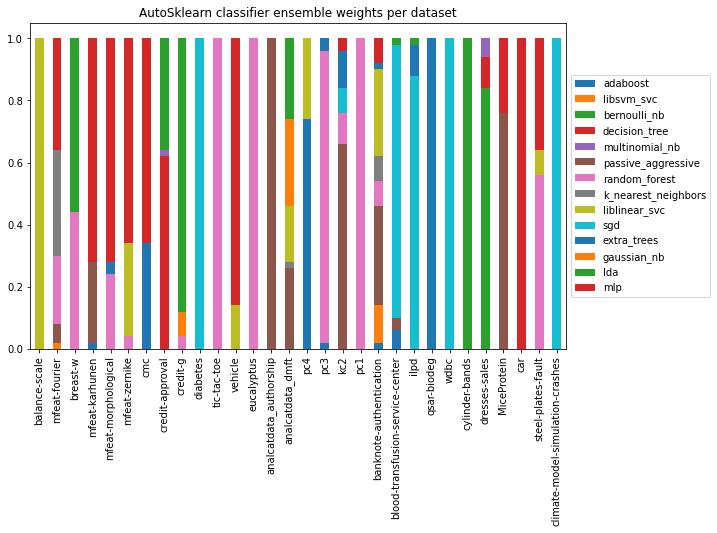

In [296]:
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(111)

df = pd.DataFrame(model_type_weight_per_dataset).T
df.plot(kind='bar', stacked=True, ax=ax)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_title("AutoSklearn classifier ensemble weights per dataset")

In [297]:
with open(r"autosklearn_models.pickle", "wb") as output_file:
  pickle.dump(best_configs, output_file)

In [ ]:
for i in range(len(test_datasets_eval)):
    results_matrix, results_matrix_per_split, table, time_matrix = make_tables(test_datasets_eval, 'acc')
    plot_scatter_with_conf(results_matrix_per_split, "Comparison of classifiers")
    break

[WARNING] [2022-11-17 09:51:19,912:matplotlib.text] posx and posy should be finite values


AttributeError: 'NoneType' object has no attribute 'remove'

[WARNING] [2022-11-17 09:51:19,997:matplotlib.text] posx and posy should be finite values
[WARNING] [2022-11-17 09:51:20,078:matplotlib.text] posx and posy should be finite values


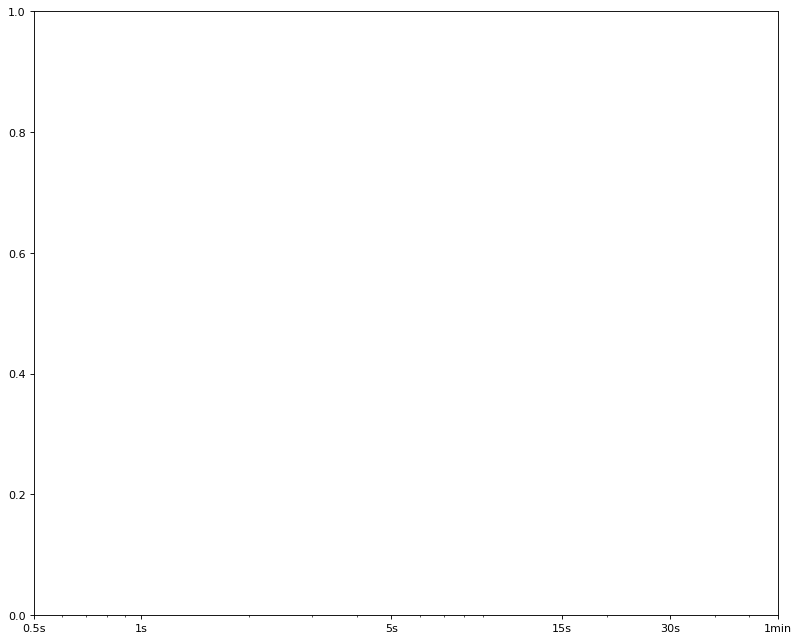

In [680]:
plot_scatter_with_conf(results_matrix_per_split, "Comparison of classifiers")

In [361]:
plot_scatter_with_conf(results_matrix_per_split_no_cat, "Comparison of classifiers on datasets with no categorical features")

ValueError: Image size of 269783x669 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 960x800 with 1 Axes>

In [356]:
plot_scatter_with_conf(results_matrix_per_split_with_cat, "Comparison of classifiers on datasets with categorical features")

ValueError: Image size of 269783x669 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 960x800 with 1 Axes>